# Aula: Gráficos que combinam variáveis **qualitativas** e **quantitativas**
### Exemplo com o dataset `gapminder` (Seaborn)

**Objetivo:** construir gráficos que resumem uma variável **quantitativa** por grupos **categóricos**

**Bibliotecas:** `seaborn`, `pandas` e `matplotlib`

> Vamos filtrar o **último ano** do dataset e comparar a **expectativa de vida** entre continentes usando:
- Gráfico de barras com **média**;
- Gráfico de barras com **mediana**;
- **Boxplot**;
- Boxplot + **pontos individuais** ("esferas") sobrepostos.



## 1. Preparação

In [3]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Carregar o dataset gapminder (via plotly express)
gap = px.data.gapminder()

# Visualizar estrutura
gap.head()


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


## 2. Filtrar o último ano disponível

In [4]:
# Filtrar apenas o último ano presente no dataset
ultimo_ano = gap['year'].max()
gap_ultimo = gap[gap['year'] == ultimo_ano].copy()
ultimo_ano, gap_ultimo.head()

(2007,
         country continent  year  lifeExp       pop     gdpPercap iso_alpha  \
 11  Afghanistan      Asia  2007   43.828  31889923    974.580338       AFG   
 23      Albania    Europe  2007   76.423   3600523   5937.029526       ALB   
 35      Algeria    Africa  2007   72.301  33333216   6223.367465       DZA   
 47       Angola    Africa  2007   42.731  12420476   4797.231267       AGO   
 59    Argentina  Americas  2007   75.320  40301927  12779.379640       ARG   
 
     iso_num  
 11        4  
 23        8  
 35       12  
 47       24  
 59       32  )

## 3. Barra: **média** da expectativa de vida por continente

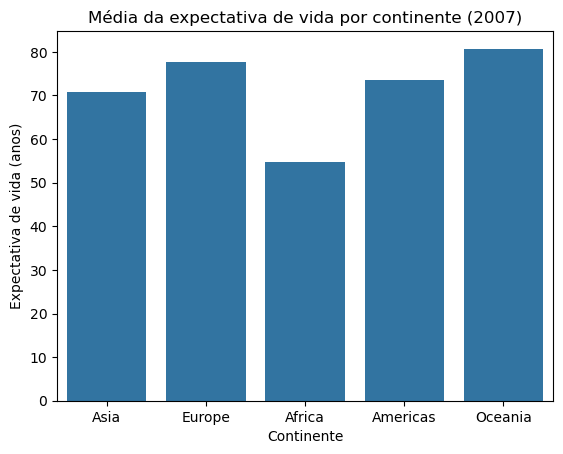

In [10]:
# Gráfico de barras com a **média**
sns.barplot(data=gap_ultimo, x='continent', y='lifeExp', estimator='mean', errorbar=None)
plt.title(f'Média da expectativa de vida por continente ({ultimo_ano})')
plt.xlabel('Continente')
plt.ylabel('Expectativa de vida (anos)')
plt.show()

## 4. Barra: **mediana** da expectativa de vida por continente

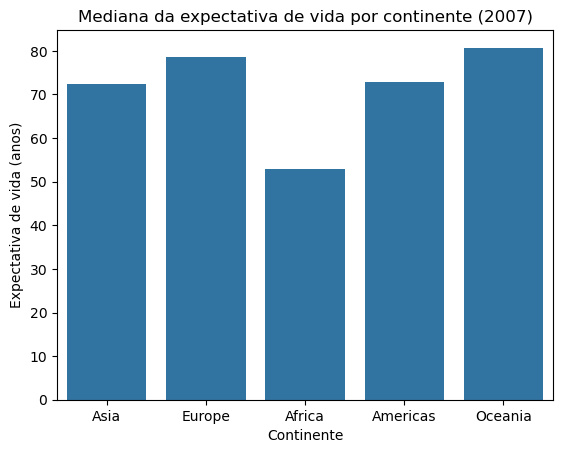

In [9]:
# Gráfico de barras com a **mediana**
sns.barplot(data=gap_ultimo, x='continent', y='lifeExp', estimator='median', errorbar=None)
plt.title(f'Mediana da expectativa de vida por continente ({ultimo_ano})')
plt.xlabel('Continente')
plt.ylabel('Expectativa de vida (anos)')
plt.show()

## 5. Boxplot: distribuição da expectativa de vida por continente

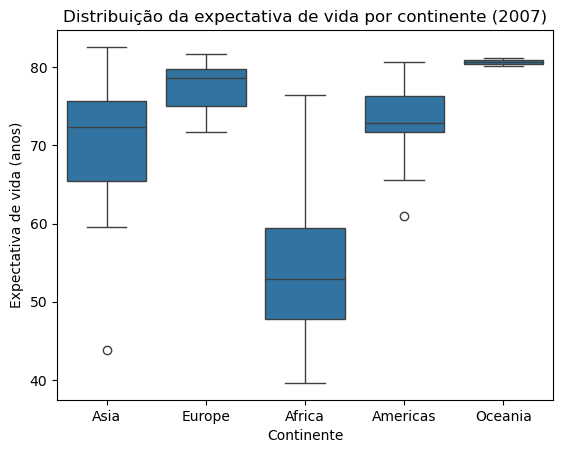

In [7]:
sns.boxplot(data=gap_ultimo, x='continent', y='lifeExp')
plt.title(f'Distribuição da expectativa de vida por continente ({ultimo_ano})')
plt.xlabel('Continente')
plt.ylabel('Expectativa de vida (anos)')
plt.show()

## 6. Boxplot + pontos individuais ("esferas") sobrepostos

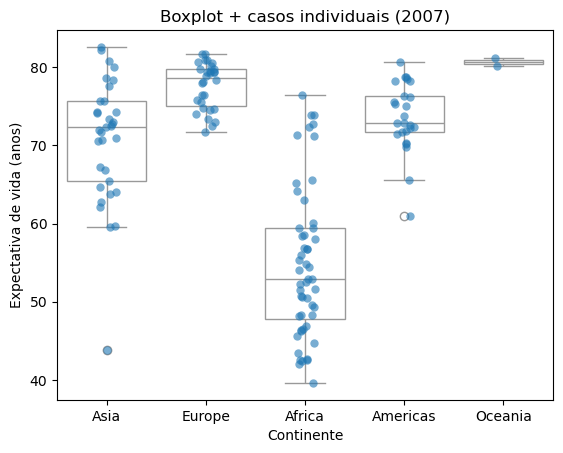

In [8]:
# Primeiro o boxplot (em branco) e depois os pontos (stripplot)
sns.boxplot(data=gap_ultimo, x='continent', y='lifeExp', color='white')
sns.stripplot(data=gap_ultimo, x='continent', y='lifeExp', alpha=0.6, size=6)
plt.title(f'Boxplot + casos individuais ({ultimo_ano})')
plt.xlabel('Continente')
plt.ylabel('Expectativa de vida (anos)')
plt.show()

## Extra: Gráficos de linha

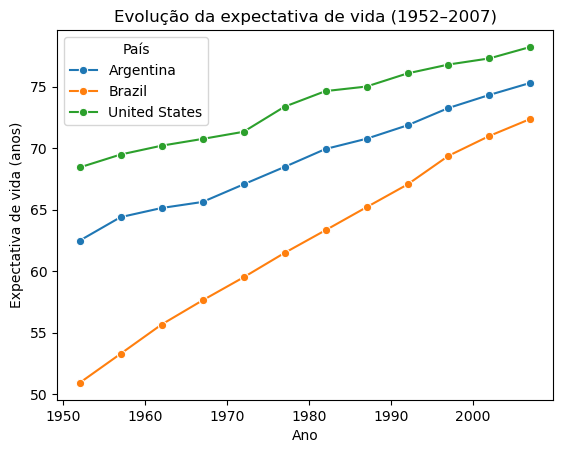

In [11]:


# Selecionar apenas alguns países
gap_sel = gap.query("country in ['Brazil', 'Argentina', 'United States']")

# Gráfico de linha simples
sns.lineplot(
    data=gap_sel,
    x='year',
    y='lifeExp',
    hue='country',
    marker='o'
)

plt.title('Evolução da expectativa de vida (1952–2007)')
plt.xlabel('Ano')
plt.ylabel('Expectativa de vida (anos)')
plt.legend(title='País')
plt.show()
